<a href="https://colab.research.google.com/github/KPorus/machine-learning-and-python/blob/main/practice_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Given a DataFrame of sales records with columns: ['Date', 'Store', 'Product', 'Sales'], filter the data for sales in January only, then calculate the total sales for each store.

In [ ]:
import pandas as pd

# Sample data
data = {
    'Date': ['2024-01-05', '2024-01-15', '2024-02-01', '2024-01-20', '2024-03-01'],
    'Store': ['A', 'A', 'B', 'C', 'A'],
    'Product': ['Apple', 'Orange', 'Banana', 'Apple', 'Banana'],
    'Sales': [150, 200, 250, 300, 100]
}
df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
# df[df['Date'].dt.month == 1].groupby('Store')['Sales'].sum()
res = df[df['Date'].dt.month == 1].groupby('Store')['Sales'].sum()
print(res)

Store
A    350
C    300
Name: Sales, dtype: int64


###Given a 2D NumPy array arr, find the row with the highest sum of values. Return the row index and the sum.

In [ ]:
import numpy as np

# Sample array
arr = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])

In [ ]:
res = arr.sum(axis=1)
print(res)

[ 6 15 24]


In [ ]:
index = res.argmax() # np.argmax(res)
print(index)
value = res[index]
print(value)

2
24


###Plot the total monthly sales from a sales dataset using Matplotlib. The dataset has columns ['Date', 'Sales'], where Date is in the format YYYY-MM-DD.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {
    'Date': ['2024-01-05', '2024-01-15', '2024-02-01', '2024-01-20', '2024-03-01'],
    'Sales': [150, 200, 250, 300, 100]
}
df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
monthly_sales = df.groupby(df['Date'].dt.to_period('M'))['Sales'].sum()
monthly_sales

,Sales
Date,
2024-01,650
2024-02,250
2024-03,100


In [ ]:
df['Date'].dt.to_period('M')

,Date
0,2024-01
1,2024-01
2,2024-02
3,2024-01
4,2024-03


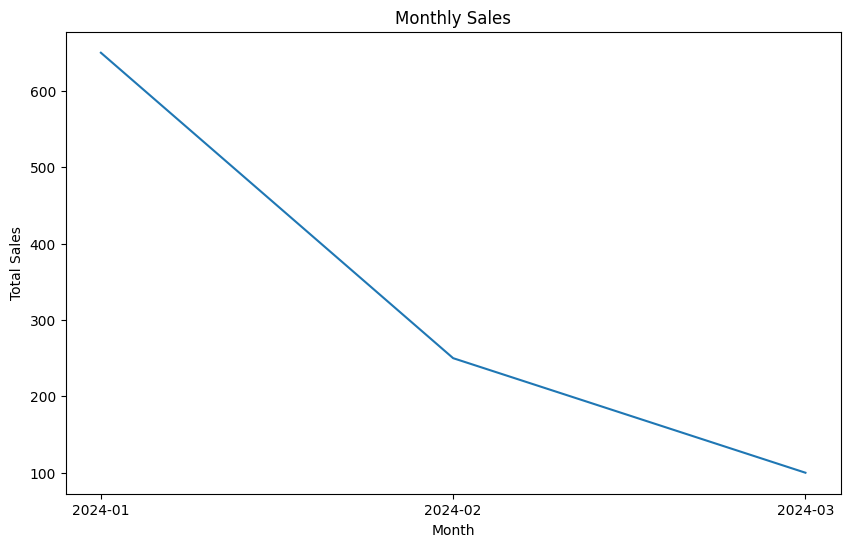

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index.astype(str), monthly_sales.values)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales')
# plt.xticks(rotation=180)
plt.show()

###Create a new column in a DataFrame df of size (10, 4) where each value is the square of the row sum if the sum is even, or the cube of the row sum if the sum is odd.

In [ ]:
import numpy as np
import pandas as pd

df = pd.DataFrame(np.random.randint(1,10, size=(10, 4)), columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,3,1,3,3
1,7,9,3,3
2,5,7,8,8
3,8,7,5,2
4,3,3,7,4
5,9,3,5,4
6,6,5,4,9
7,7,8,1,4
8,9,5,4,2
9,9,8,7,9


In [ ]:
row_sum = df.sum(axis=1)
row_sum

,0
0,10
1,22
2,28
3,22
4,17
5,21
6,24
7,20
8,20
9,33


In [ ]:
df['new'] = np.where(row_sum%2==0, row_sum**2, row_sum**3)
df

,A,B,C,D,new
0,3,1,3,3,100
1,7,9,3,3,484
2,5,7,8,8,784
3,8,7,5,2,484
4,3,3,7,4,4913
5,9,3,5,4,9261
6,6,5,4,9,576
7,7,8,1,4,400
8,9,5,4,2,400
9,9,8,7,9,35937


In [ ]:
# new_df = row_sum.apply(lambda x: x**3 if x%2 else x**2)
# new_df

###Using Matplotlib, create a 1x2 subplot. On the left plot, plot the square of values from 1 to 10, and on the right plot, plot the cube of values from 1 to 10.

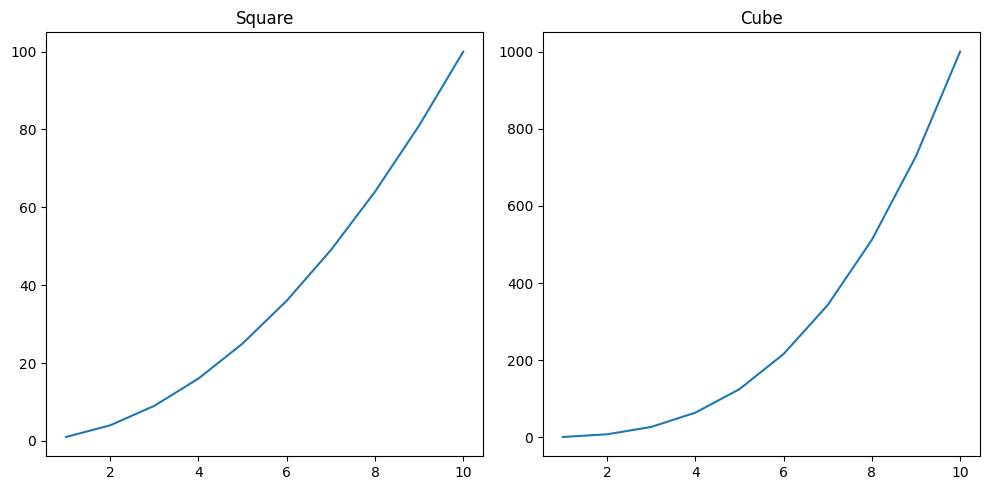

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

x = np.arange(1, 11)
y1 = x**2
y2 = x**3

ax[0].plot(x, y1)
ax[0].set_title('Square')
ax[1].plot(x, y2)
ax[1].set_title('Cube')

plt.tight_layout()
plt.show()

###Given a DataFrame df with columns ['Name', 'Score'], create a new column named 'Grade' that assigns a grade based on the Score column as follows:

####**Score >= 90: Grade 'A'**
####**Score >= 75: Grade 'B'**
####**Score >= 60: Grade 'C'**
####**Score < 60: Grade 'D'**

In [ ]:
import pandas as pd
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'Score': [95, 67, 85, 58, 92]
}
df = pd.DataFrame(data)
df

,Name,Score
0,Alice,95
1,Bob,67
2,Charlie,85
3,David,58
4,Eve,92


In [ ]:
df['Grade'] = pd.cut(df['Score'], bins=[0, 59, 74, 89, 100], labels=['D', 'C', 'B', 'A'])
df

,Name,Score,Grade
0,Alice,95,A
1,Bob,67,C
2,Charlie,85,B
3,David,58,D
4,Eve,92,A


###Create a 5x5 matrix of random integers between 1 and 100. Find the row with the highest sum, then sort that row in ascending order

In [16]:
import numpy as np

df  = np.random.randint(1, 101, size=(5,5))
df

array([[43, 66, 43,  9, 25],
       [82, 43, 19, 22, 75],
       [56, 43, 91, 25, 94],
       [35, 39, 56, 65, 30],
       [70, 16, 78, 54, 30]])

In [17]:
res = df.sum(axis=1)
res

array([186, 241, 309, 225, 248])

In [18]:
index = res.argmax()
res[index]

309

In [21]:
df[index]

array([56, 43, 91, 25, 94])

In [30]:
order = np.sort(df[index])
print(order)

[25 43 56 91 94]


###Plot two sine waves on the same graph for the x-values from 0 to 2π. One sine wave should have an amplitude of 1, and the other an amplitude of 0.5. Add a legend to differentiate them.

In [33]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2*np.pi, 100)
x

array([0.        , 0.06346652, 0.12693304, 0.19039955, 0.25386607,
       0.31733259, 0.38079911, 0.44426563, 0.50773215, 0.57119866,
       0.63466518, 0.6981317 , 0.76159822, 0.82506474, 0.88853126,
       0.95199777, 1.01546429, 1.07893081, 1.14239733, 1.20586385,
       1.26933037, 1.33279688, 1.3962634 , 1.45972992, 1.52319644,
       1.58666296, 1.65012947, 1.71359599, 1.77706251, 1.84052903,
       1.90399555, 1.96746207, 2.03092858, 2.0943951 , 2.15786162,
       2.22132814, 2.28479466, 2.34826118, 2.41172769, 2.47519421,
       2.53866073, 2.60212725, 2.66559377, 2.72906028, 2.7925268 ,
       2.85599332, 2.91945984, 2.98292636, 3.04639288, 3.10985939,
       3.17332591, 3.23679243, 3.30025895, 3.36372547, 3.42719199,
       3.4906585 , 3.55412502, 3.61759154, 3.68105806, 3.74452458,
       3.8079911 , 3.87145761, 3.93492413, 3.99839065, 4.06185717,
       4.12532369, 4.1887902 , 4.25225672, 4.31572324, 4.37918976,
       4.44265628, 4.5061228 , 4.56958931, 4.63305583, 4.69652

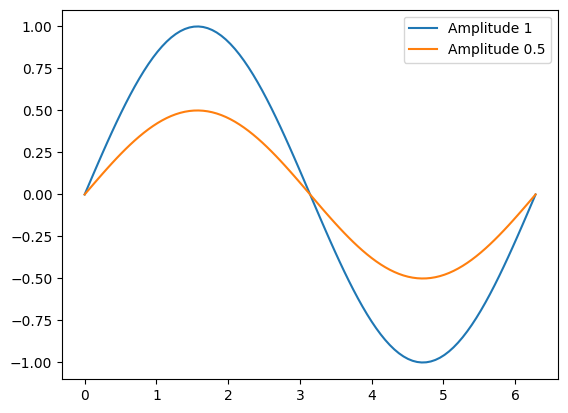

In [34]:
y1 = np.sin(x)
y2 = 0.5*np.sin(x)

plt.plot(x, y1, label='Amplitude 1')
plt.plot(x, y2, label='Amplitude 0.5')
plt.legend()
plt.show()

###Given a time series DataFrame df with columns ['Date', 'Value'], calculate a rolling mean with a window of 3 days. Assume that Date is sorted and does not contain any missing dates.

In [38]:
import pandas as pd

# Sample data
data = {
    'Date': pd.date_range(start='2024-01-01', periods=10, freq='D'),
    'Value': [10, 15, 10, 20, 25, 20, 30, 35, 40, 45]
}
df = pd.DataFrame(data)
df

,Date,Value
0,2024-01-01,10
1,2024-01-02,15
2,2024-01-03,10
3,2024-01-04,20
4,2024-01-05,25
5,2024-01-06,20
6,2024-01-07,30
7,2024-01-08,35
8,2024-01-09,40
9,2024-01-10,45


In [39]:
new_df = df['Value'].rolling(window=3).mean()
new_df

,Value
0,NaN
1,NaN
2,11.666667
3,15.000000
4,18.333333
5,21.666667
6,25.000000
7,28.333333
8,35.000000
9,40.000000


###Create a 1D NumPy array of integers from 1 to 100. Filter the array to include only numbers that are both divisible by 3 and greater than 50.

In [40]:
import numpy as np

arr = np.arange(1, 101)
arr

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [44]:
len(arr)

100

In [49]:
res = arr[(arr%3==0) & (arr>50)]
res

array([51, 54, 57, 60, 63, 66, 69, 72, 75, 78, 81, 84, 87, 90, 93, 96, 99])

In [48]:
# res = [x for i in arr if i%3==0 and i>50]
# res

###Given two lists x and y, create a scatter plot where points are colored based on whether the y value is above or below the mean of the y list.

In [52]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(1,11)
y = np.random.randint(10,101, 10)
print(x)
print(y)

[ 1  2  3  4  5  6  7  8  9 10]
[69 95 27 34 33 27 40 42 67 18]


In [53]:
means_y= np.mean(y)
means_y

45.2

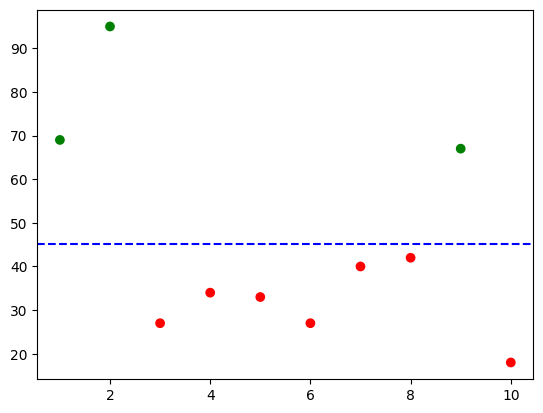

In [56]:
colors = ['green' if yi > means_y else 'red' for yi in y]
plt.scatter(x, y, c=colors)
plt.axhline(means_y, color='blue', linestyle='--', label='Mean of y')
plt.show()

###Given a DataFrame df with columns ['Product', 'Price'], increase the price by 20% if it’s less than 50 and decrease it by 10% if it’s greater than 100.

In [57]:
import pandas as pd

# Sample data
data = {
    'Product': ['A', 'B', 'C', 'D', 'E'],
    'Price': [45, 150, 25, 60, 110]
}
df = pd.DataFrame(data)
df

,Product,Price
0,A,45
1,B,150
2,C,25
3,D,60
4,E,110


In [59]:
df['Adjusted_price']=df['Price'].apply(lambda x:x*1.2 if x<50 else (x*0.9 if x>100 else x))
df

,Product,Price,Adjusted_price
0,A,45,54.0
1,B,150,135.0
2,C,25,30.0
3,D,60,60.0
4,E,110,99.0


###Create a histogram of a 1D array with values between 1 and 100, using 5 bins, and label each bin. Generate the array using random integers.

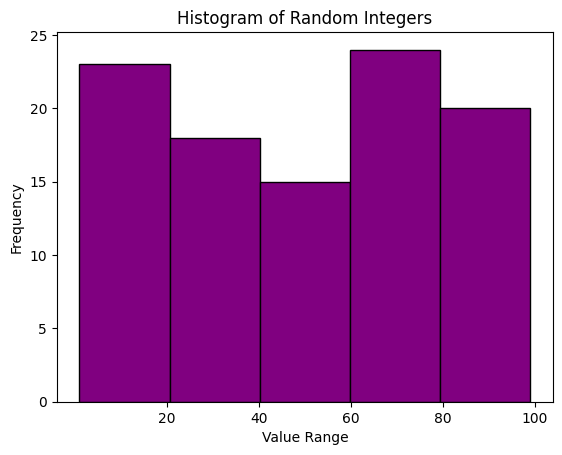

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# Generate data
data = np.random.randint(1, 101, size=100)

# Plot histogram
plt.hist(data, bins=5, color='purple', edgecolor='black')
plt.title("Histogram of Random Integers")
plt.xlabel("Value Range")
plt.ylabel("Frequency")
plt.xticks([20, 40, 60, 80, 100])
plt.show()
